In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv("Car_Ownership.csv")

In [63]:
df.head(10)

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
5,Engineer,50000,750.0,6,Fair,No issues,No,1
6,Teacher,35000,700.0,8,Fair,Late payment 3 months ago,Yes,NaN
7,Nurse,20000,600.0,3,Poor,Late payment 1 month ago,No,NaN
8,Businessman,120000,850.0,20,Excellent,No issues,Yes,NaN
9,Doctor,90000,800.0,10,Good,No issues,Yes,NaN


In [64]:
df.describe()

,Credit Score
count,460.000000
mean,702.969565
std,69.232323
min,500.000000
25%,650.000000
50%,700.000000
75%,750.000000
max,900.000000


In [65]:

df.isnull().sum()/df.shape[0]*100

Occupation              2.0
Monthly Income          2.6
Credit Score            8.0
Years of Employment     8.6
Finance Status          4.6
Finance History         5.6
Car                     4.0
Number of Children     25.0
dtype: float64

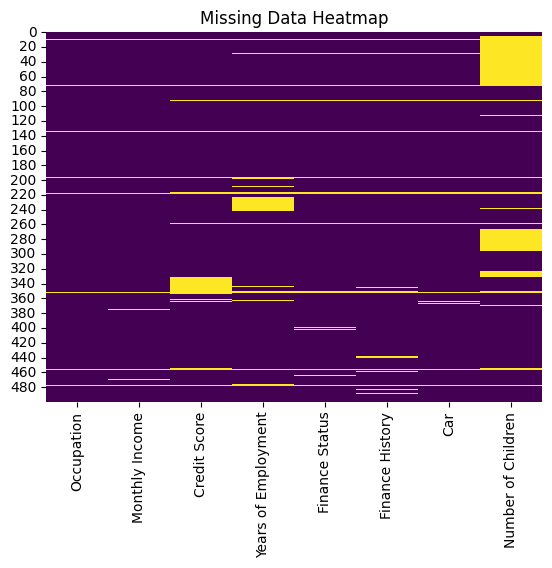

In [66]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Handling Null Values 

### 1. Occupation

In [67]:
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])

### 2. Monthly Income

In [68]:
import re

def clean_income(value):
    # Convert to string, lower case, and remove common unwanted characters
    value = str(value).lower().replace('$', '').replace(',', '').replace(' ', '')
    
    # Handle 'k' for thousands
    if 'k' in value:
        value = value.replace('k', '')
        try:
            return float(value) * 1000
        except ValueError:
            return None
    
    # Use regex to remove non-numeric characters, except for '.' (decimal point)
    value = re.sub(r'[^\d.]+', '', value)

    # Try converting the cleaned string to a float
    try:
        return float(value)
    except ValueError:
        return None  # Return None or another default value on failure

df['Monthly Income'] = df['Monthly Income'].apply(clean_income)


In [69]:
df['Monthly Income'] = df['Monthly Income'].fillna(df['Monthly Income'].median())


### 3. Credit score

In [70]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())


### 4. Years Of Emplopyment

In [71]:
def extract_years(value):
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            # Remove any non-numeric characters and convert to integer
            value = value.lower().replace('years', '').replace('year', '').replace('y', '').strip()
        try:
            return float(value)
        except ValueError:
            return np.nan
    
    # Apply the helper function to the column
df['Years of Employment'] = df['Years of Employment'].apply(extract_years)
    

In [72]:
df['Years of Employment'] = df['Years of Employment'].fillna(df['Years of Employment'].median())


### 5. Financial Status

In [73]:
df['Finance Status'] = df['Finance Status'].fillna(df['Finance Status'].mode()[0])


### 6. Finance History 

In [74]:
df['Finance History'] = df['Finance History'].fillna(df['Finance History'].mode()[0])


### 7. Car

In [75]:
df['Car'] = df['Car'].fillna(df['Car'].mode()[0])


### 8. Number of Children 

In [76]:
def clean_years(column):
    # Replace known non-numeric strings with NaN
    column_cleaned = column.replace(['na', 'nan', 'N/A', None], np.nan)
    
    # Convert the cleaned column to numeric, forcing invalid entries to NaN
    column_numeric = pd.to_numeric(column_cleaned, errors='coerce')
    
    return column_numeric
df['Number of Children'] = clean_years(df['Number of Children'])
df['Number of Children'] = df['Number of Children'].fillna(df['Number of Children'].median())
df['Number of Children'] = df['Number of Children'].astype(int)



## Analysing Outliers 

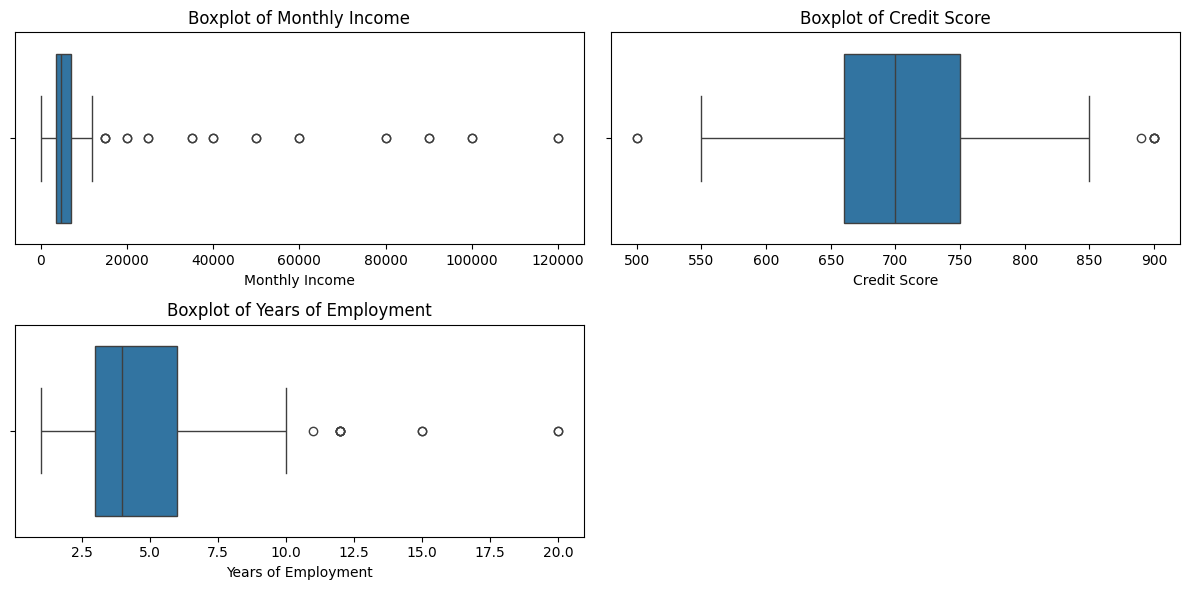

In [80]:
numeric_cols = ['Monthly Income', 'Credit Score', 'Years of Employment']

n_cols = 2  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i]) 
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

## Correlation 

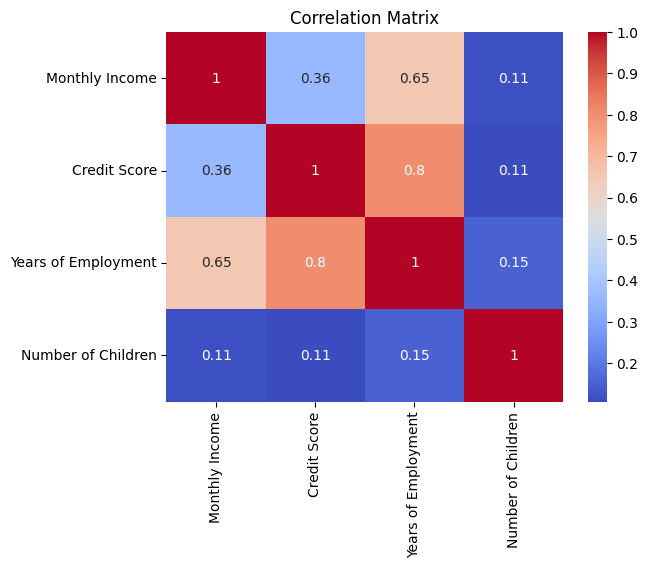

In [78]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

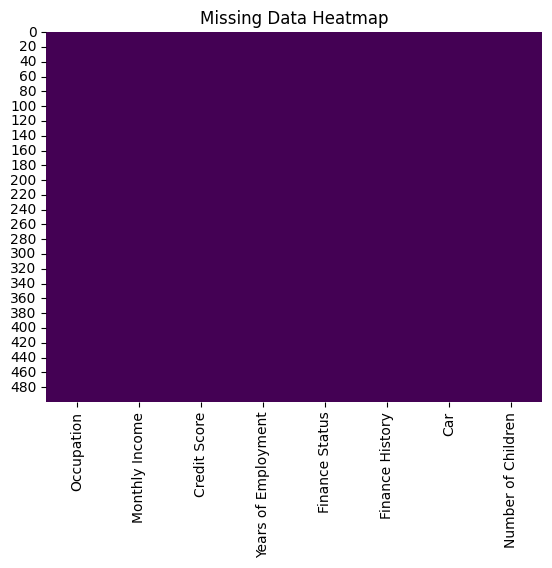

In [79]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()